In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import p5_util
import p9_util_benchmark
filename_param = p9_util_benchmark.build_filename_param()
print(filename_param)
dict_param_benchmark = p5_util.object_load(filename_param, is_verbose=True)
filename = p9_util_benchmark.build_filename_model()
print(filename)

./data/benchmark/dict_param_submission__model_jigsaw_submission_sampleFULL_threshold0.5.dill
p5_util.object_load : fileName= ./data/benchmark/dict_param_submission__model_jigsaw_submission_sampleFULL_threshold0.5.dill
./data/benchmark/model_jigsaw_submission_sampleFULL_threshold0.5_best.h5


In [24]:
import p5_util
import p9_util_benchmark
filename = p9_util_benchmark.build_filename_param()
dict_param_benchmark = p5_util.object_load(filename)
dict_param_benchmark

p5_util.object_load : fileName= ./data/benchmark/dict_param_submission__model_jigsaw_submission_sampleFULL_threshold0.5.dill


{'root_directory': './data/benchmark/',
 'format_file': '.dill',
 'format_model': '.h5',
 'root_filename_benchmark': './data/benchmark/df_sample_benchmark_',
 'root_filename_model': 'model_jigsaw_',
 'n_sample': 360975,
 'n_sample_train': None,
 'is_dataset_reloaded': True,
 'model_type': 'submission',
 'is_model_reloaded': False,
 'threshold': 0.5,
 'embeddings_dimension': 300,
 'val_score_max': True,
 'epochs': 10}

#### Compute and display AUC distributions for each identity

    Load dataset for validation

In [31]:
import p9_util_benchmark

#--------------------------------------------------------------------
# Build filename for validatation dataset
#--------------------------------------------------------------------
filename_benchmark = p9_util_benchmark.build_filename_benchmark(dict_param_benchmark=dict_param_benchmark)
print("\nFile name for validation dataset = {}".format(filename_benchmark))
df_validate = p5_util.object_load(filename_benchmark)


File name for validation dataset = ./data/benchmark/df_sample_benchmark_valid_300D_FULL.dill
p5_util.object_load : fileName= ./data/benchmark/df_sample_benchmark_valid_300D_FULL.dill


    Load trained model

In [30]:
import p9_util_benchmark
import p9_util
#--------------------------------------------------------------------
# Build filename for benchmark model
#--------------------------------------------------------------------
filename_model = p9_util_benchmark.build_filename_model(dict_param_benchmark=dict_param_benchmark)
print("\nFile name for model = {}".format(filename_model))
model = p9_util.keras_model_load(filename_model)


File name for model = ./data/benchmark/model_jigsaw_submission_sampleFULL_threshold0.5_best.h5

Loading model...


    Load Tokenizer

In [36]:
import p9_util_benchmark

#--------------------------------------------------------------------
# Build filename for Tokenizer
#--------------------------------------------------------------------
filename_tokenizer = p9_util_benchmark.build_filename_tokenizer(dict_param_benchmark=dict_param_benchmark)
print("\nFile name for tokenizer = {}".format(filename_tokenizer))
tokenizer        = p5_util.object_load(filename_tokenizer, is_verbose = True) 



File name for tokenizer = ./data/benchmark/tokenizer_FULL.dill
p5_util.object_load : fileName= ./data/benchmark/tokenizer_FULL.dill


    Compute predictions

In [ ]:
import p9_util_benchmark

MODEL_NAME = 'my_model'
TOXICITY_COLUMN = 'target'
TEXT_COLUMN = 'comment_text'
# List all identities
identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']
X_valid = p9_util_benchmark.pad_text(df_validate[TEXT_COLUMN], tokenizer)
df_validate[MODEL_NAME] = model.predict(X_valid)[:, 1]



In [44]:
df_bias_metrics = p9_util_metrics.compute_bias_metrics_for_model(df_validate, identity_columns, \
                                                                   MODEL_NAME, TOXICITY_COLUMN)

In [45]:
import p9_util_metrics

overall_auc = p9_util_metrics.calculate_overall_auc(df_validate, MODEL_NAME,TOXICITY_COLUMN)

print("Overall AUC = {}".format(overall_auc))

score = p9_util_metrics.get_final_metric(df_bias_metrics, overall_auc)
print("Score = {}".format(score))
print("")
df_bias_metrics

Overall AUC = 0.9299067348163434
Bias score contribution : 0.6557258966992375
Score = 0.8882025804033233



,bnsp_auc,bpsn_auc,subgroup,subgroup_auc,subgroup_size
5,0.947862,0.805555,muslim,0.818181,4261
7,0.958519,0.785189,white,0.821673,5015
6,0.959149,0.779959,black,0.821964,2958
2,0.955701,0.793160,homosexual_gay_or_lesbian,0.826999,2209
4,0.934687,0.862453,jewish,0.854121,1563
8,0.946230,0.845690,psychiatric_or_mental_illness,0.867229,964
1,0.931124,0.885238,female,0.880461,10789
0,0.945799,0.870465,male,0.887909,8823
3,0.911606,0.916216,christian,0.892852,8246


In [46]:
import p9_util_metrics

    Global AUC

In [ ]:
import p9_util_benchmark
import numpy as np
X_valid = p9_util_benchmark.pad_text(df_validate[TEXT_COLUMN], tokenizer)
y_valid = df_validate[TOXICITY_COLUMN]
y_predict = np.round(df_validate[MODEL_NAME])

In [48]:
y_predict.shape

(360975,)

/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[0, 1]

Confusion matrix for all classes : 

[[328703   3508]
 [ 15158  13606]]

Normalized confusion matrix
[[0.98944045 0.01055955]
 [0.52697817 0.47302183]]
Confusion matrix, without normalization
[[328703   3508]
 [ 15158  13606]]

TP rate = [0.         0.47302183 1.        ]
FP rate = [0.         0.01055955 1.        ]
AUC = 0.7312311394141169


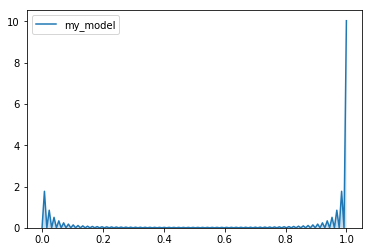

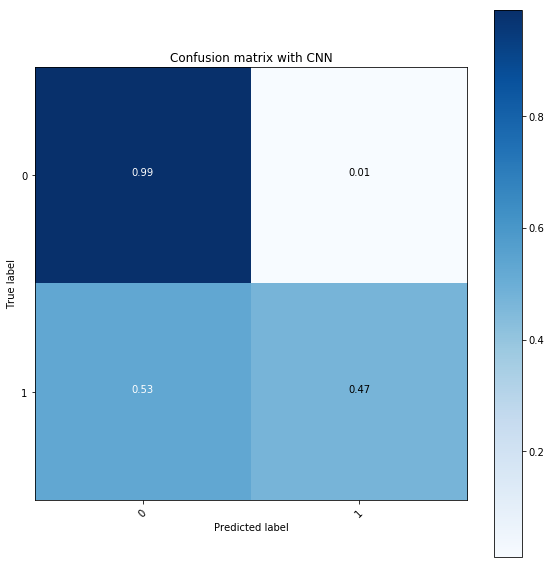

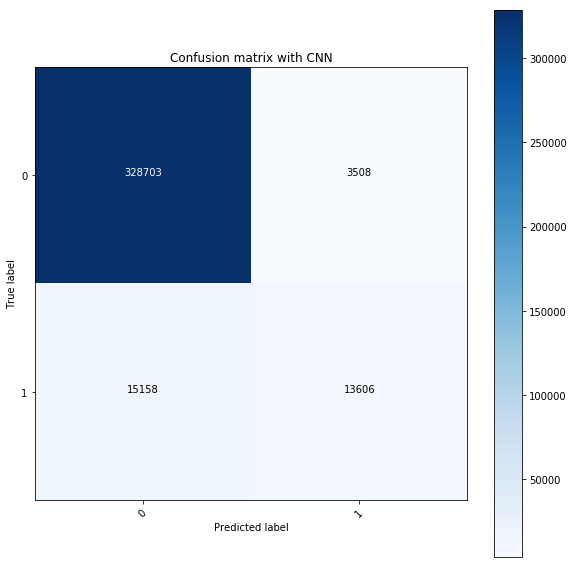

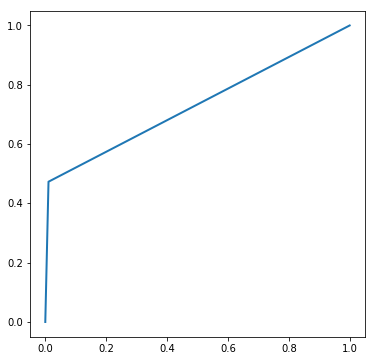

In [49]:
import p9_util
y_= p9_util.display_class_performance(model, X_valid, y_valid, is_binary=True, \
                                      y_pred=y_predict, nb_classes=2,\
                                      title="Confusion matrix with CNN")

#### Plot model leraning performances

In [21]:
import p5_util
import p7_util
import p9_util_benchmark

dict_param_benchmark = p9_util_benchmark.dict_param_benchmark.copy()
filename_history = p9_util_benchmark.build_filename_history(dict_param_benchmark=dict_param_benchmark)
n_sample_train = dict_param_benchmark['n_sample_train'] 
embeddings_dimension = dict_param_benchmark['embeddings_dimension']
if n_sample_train is not None :
    n_sample_train = n_sample_train//1000
else :
    pass
history = p5_util.object_load(filename_history)
if history is not None :
    legend = "CNN with "+str(n_sample_train)+"K docs / "+str(embeddings_dimension)+"D"
    model = None

    list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)
else :
    pass



*** ERROR : unknown file = ./data/benchmark/history_submission_300D_FULL_.dill


p5_util.object_load : fileName= ./data/benchmark/history_submission_300D_100000_.dill


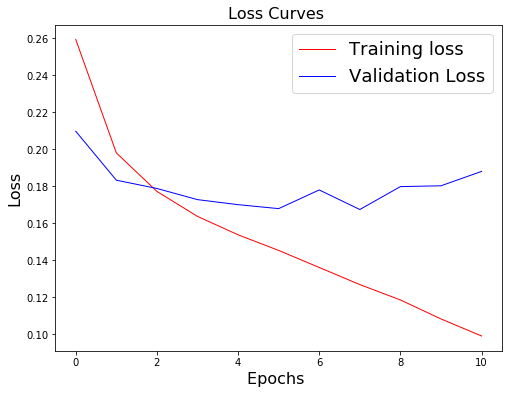

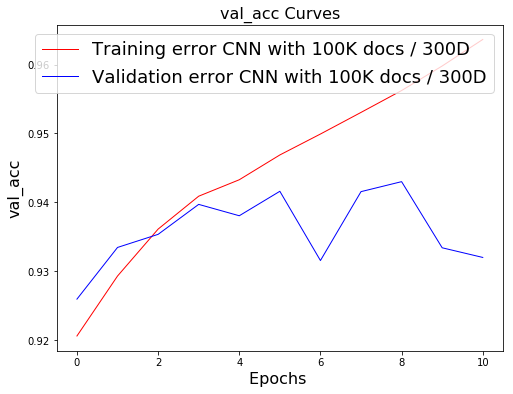

In [40]:
import p5_util
import p7_util
import p9_util_benchmark

dict_param_benchmark = p9_util_benchmark.dict_param_benchmark.copy()
filename_history = p9_util_benchmark.build_filename_history(dict_param_benchmark=dict_param_benchmark)
n_sample_train = dict_param_benchmark['n_sample_train'] 
embeddings_dimension = dict_param_benchmark['embeddings_dimension']

n_sample_train = n_sample_train//1000
history = p5_util.object_load(filename_history)
legend = "CNN with "+str(n_sample_train)+"K docs / "+str(embeddings_dimension)+"D"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

p5_util.object_load : fileName= ./data/benchmark/history_submission_300D_100000_.dill


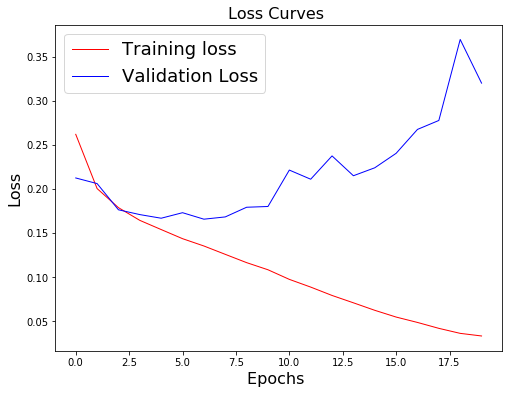

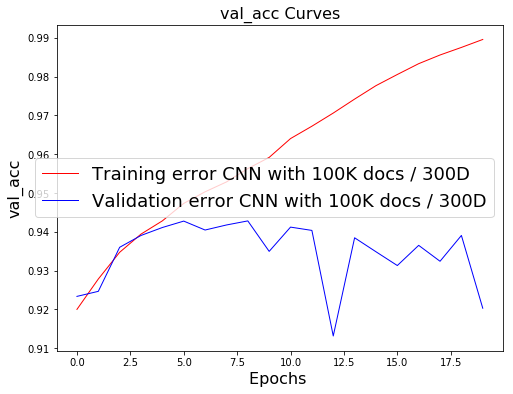

In [28]:
import p5_util
import p7_util
import p9_util_benchmark

dict_param_benchmark = p9_util_benchmark.dict_param_benchmark.copy()
filename_history = p9_util_benchmark.build_filename_history(dict_param_benchmark=dict_param_benchmark)
n_sample_train = dict_param_benchmark['n_sample_train'] 
embeddings_dimension = dict_param_benchmark['embeddings_dimension']

n_sample_train = n_sample_train//1000
history = p5_util.object_load(filename_history)
legend = "CNN with "+str(n_sample_train)+"K docs / "+str(embeddings_dimension)+"D"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

In [34]:
filename_param = './data/benchmark/dict_param_benchmark__model_jigsaw_benchmark_sample50000_threshold0.5.dill'
dict_param_benchmark = p5_util.object_load(filename_param)

p5_util.object_load : fileName= ./data/benchmark/dict_param_benchmark__model_jigsaw_benchmark_sample50000_threshold0.5.dill


p5_util.object_load : fileName= ./data/benchmark/history_benchmark_100D_50000_.dill


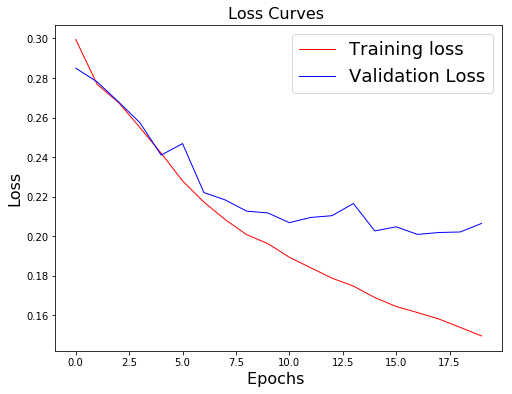

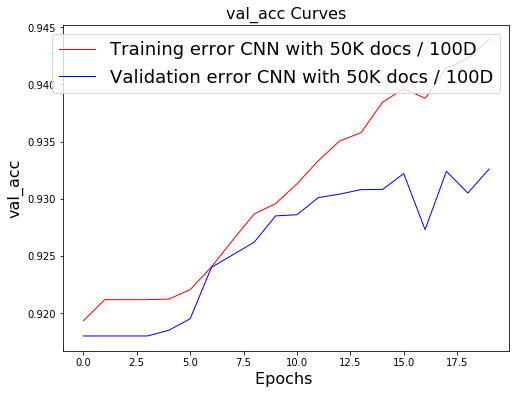

In [35]:
import p5_util
import p7_util
import p9_util_benchmark

filename_history = p9_util_benchmark.build_filename_history(dict_param_benchmark=dict_param_benchmark)
n_sample_train = dict_param_benchmark['n_sample_train'] 
embeddings_dimension = dict_param_benchmark['embeddings_dimension']

n_sample_train = n_sample_train//1000
history = p5_util.object_load(filename_history)
legend = "CNN with "+str(n_sample_train)+"K docs / "+str(embeddings_dimension)+"D"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

p5_util.object_load : fileName= ./data/benchmark/history_benchmark_20Epoch_300D_50000.dill


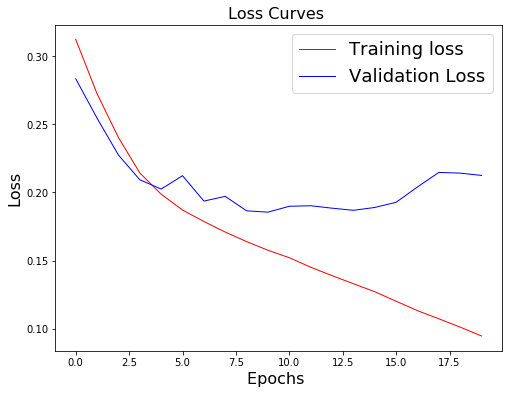

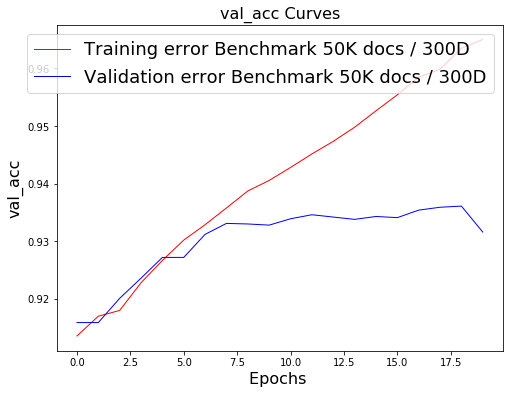

In [4]:
filename = './data/benchmark/history_benchmark_20Epoch_300D_50000.dill'
history = p5_util.object_load(filename)
legend = "Benchmark 50K docs / 300D"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

p5_util.object_load : fileName= ./data/benchmark/history_benchmark_20Epoch_100D_50000.dill


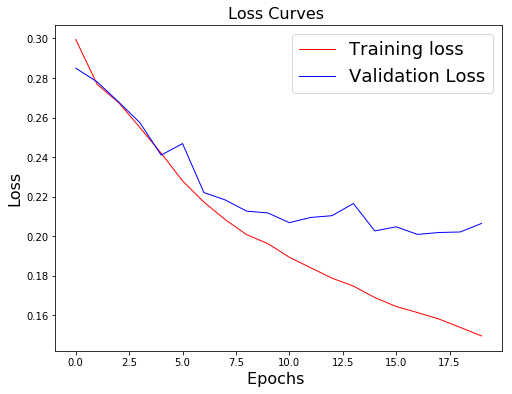

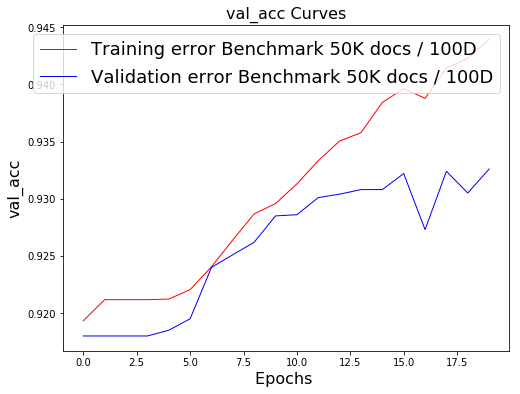

In [6]:
filename = './data/benchmark/history_benchmark_20Epoch_100D_50000.dill'
history = p5_util.object_load(filename)
legend = "Benchmark 50K docs / 100D"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)